### Importing 

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CoilData = pd.read_csv("data/Constriction.csv")

In [105]:
CoilData

,Unnamed: 0,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,...,s,al,ma,b,n,ti,cr,va,mo,constriction
0,0,396378,1,K371,10003,101,1302.1,1147,921,4.36,...,143,304,291,1,34,6,302,0,25,0
1,1,396376,3,K371,10123,101,1282.3,1150,920,4.37,...,90,395,384,1,33,12,189,25,7,0
2,2,396377,4,K321,10040,102,1297.4,1183,933,4.43,...,115,476,463,1,20,11,288,0,40,0
3,3,396379,3,K371,10243,102,1295.2,1165,910,4.44,...,98,306,296,1,21,9,253,0,9,0
4,4,396380,4,K321,10012,100,1293.3,1192,909,3.95,...,121,340,329,1,28,8,297,0,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57089,57089,20814,1,K371,9781,98,1010.0,1193,883,1.84,...,129,303,296,1,30,8,238,1,27,-1
57090,57090,20815,3,K371,9799,98,1010.6,1176,900,1.84,...,127,315,308,1,32,8,236,1,25,-1
57091,57091,20816,1,K371,9864,99,1008.6,1187,909,1.84,...,120,355,347,1,37,9,230,0,21,-1
57092,57092,20817,3,K371,10039,100,1012.7,1161,893,1.84,...,129,306,296,1,27,7,280,0,25,-1


### Cleaning Data

In [106]:
def clean_data(CoilData):
    #Replace *** with nan & drop them
    CoilData = CoilData.replace('^\*+$', np.NaN, regex=True)
    CoilData = CoilData.dropna()

    #Also drop where we couldnt calculate a constriction due to incorrect/missing csv files
    CoilData = CoilData.drop(CoilData[CoilData['constriction'] == -1].index)
    CoilData = CoilData.reset_index(drop=True)
    CoilData = CoilData.drop('Unnamed: 0',1)
    return CoilData

CoilData = clean_data(CoilData)
CoilData

C:\Users\Frede\AppData\Local\Temp/ipykernel_13976/304520901.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  CoilData = CoilData.drop('Unnamed: 0',1)


,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,Thickness profile,...,s,al,ma,b,n,ti,cr,va,mo,constriction
0,396378,1,K371,10003,101,1302.1,1147,921,4.36,31,...,143,304,291,1,34,6,302,0,25,0
1,396376,3,K371,10123,101,1282.3,1150,920,4.37,35,...,90,395,384,1,33,12,189,25,7,0
2,396377,4,K321,10040,102,1297.4,1183,933,4.43,25,...,115,476,463,1,20,11,288,0,40,0
3,396379,3,K371,10243,102,1295.2,1165,910,4.44,28,...,98,306,296,1,21,9,253,0,9,0
4,396380,4,K321,10012,100,1293.3,1192,909,3.95,26,...,121,340,329,1,28,8,297,0,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55322,15618,1,K371,9948,99,1257.3,1183,913,3.27,11,...,160,389,339,1,26,7,199,0,30,0
55323,15620,1,K371,9951,100,1256.6,1180,922,2.68,12,...,160,405,379,1,24,7,194,0,30,1
55324,15621,3,K371,9885,99,1257.2,1182,919,2.68,13,...,159,334,324,1,26,8,248,0,36,0
55325,15622,1,K371,9885,99,1257.1,1194,923,2.68,11,...,159,334,324,1,26,8,248,0,36,0


In [107]:
CoilData.to_csv("data/CleanCoilData.csv")

 ### Exploring Data 

In [108]:
print(CoilData[CoilData['constriction'] == 1].shape)
print(CoilData[CoilData['constriction'] == 0].shape)
CoilData.shape

(3725, 25)
(51602, 25)


(55327, 25)

In [109]:
columns = CoilData.columns.to_list()
columns

['coil',
 'furnace Number',
 'analyse',
 'Hardness_1',
 'Hardness_2',
 'Width',
 'Temperature before finishing mill',
 'Temperature after finishing mill',
 'Thickness',
 'Thickness profile',
 'c',
 'mn',
 'si',
 'nb',
 'p',
 's',
 'al',
 'ma',
 'b',
 'n',
 'ti',
 'cr',
 'va',
 'mo',
 'constriction']

##### Draw graphs for each feature

C:\Users\Frede\AppData\Local\Temp/ipykernel_13976/480641505.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9),dpi=100)


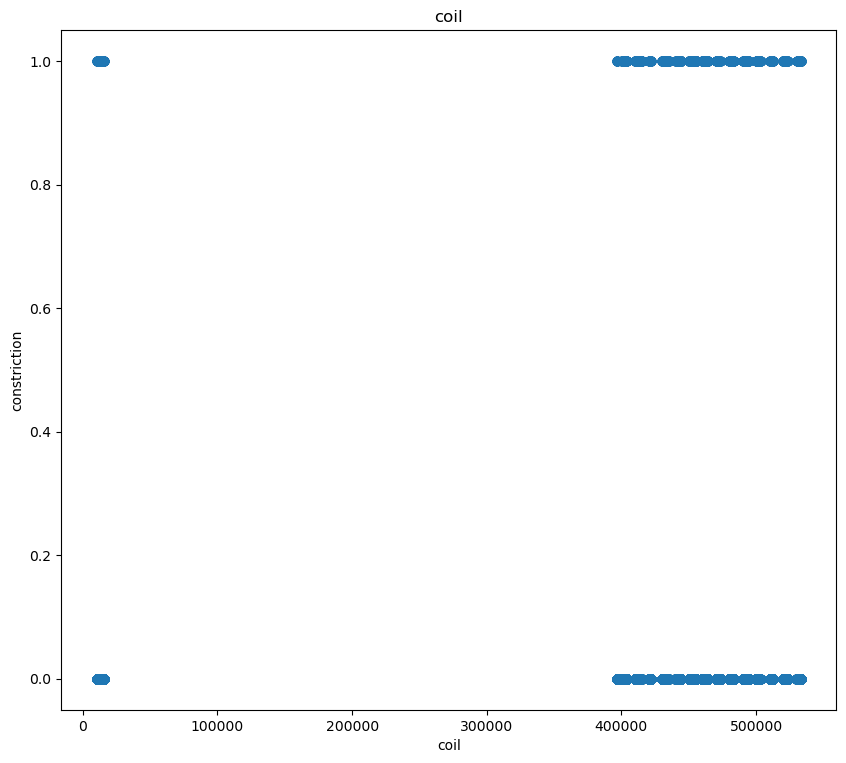

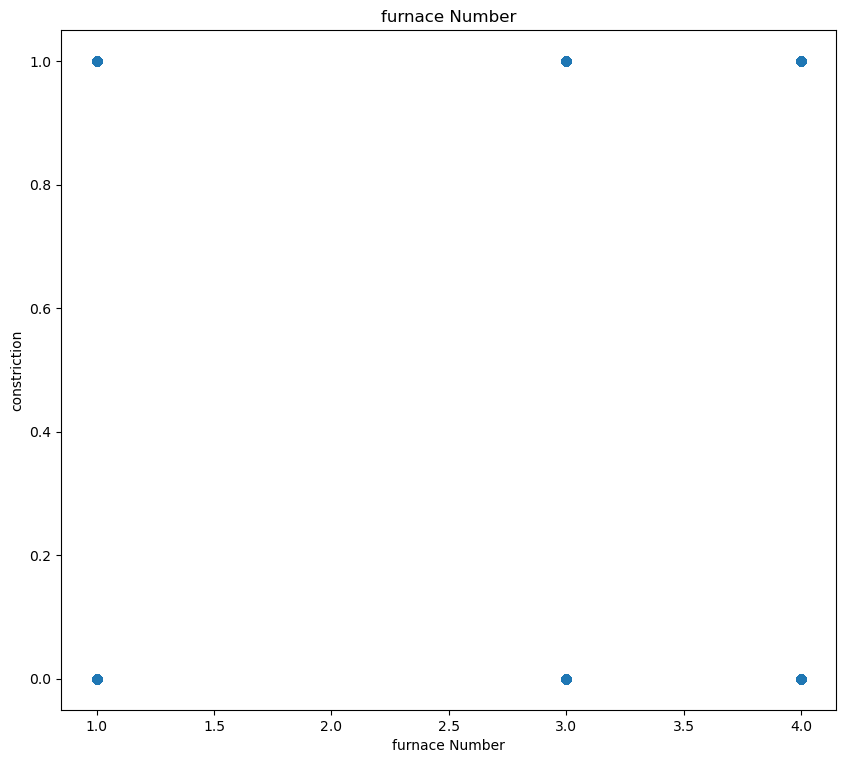

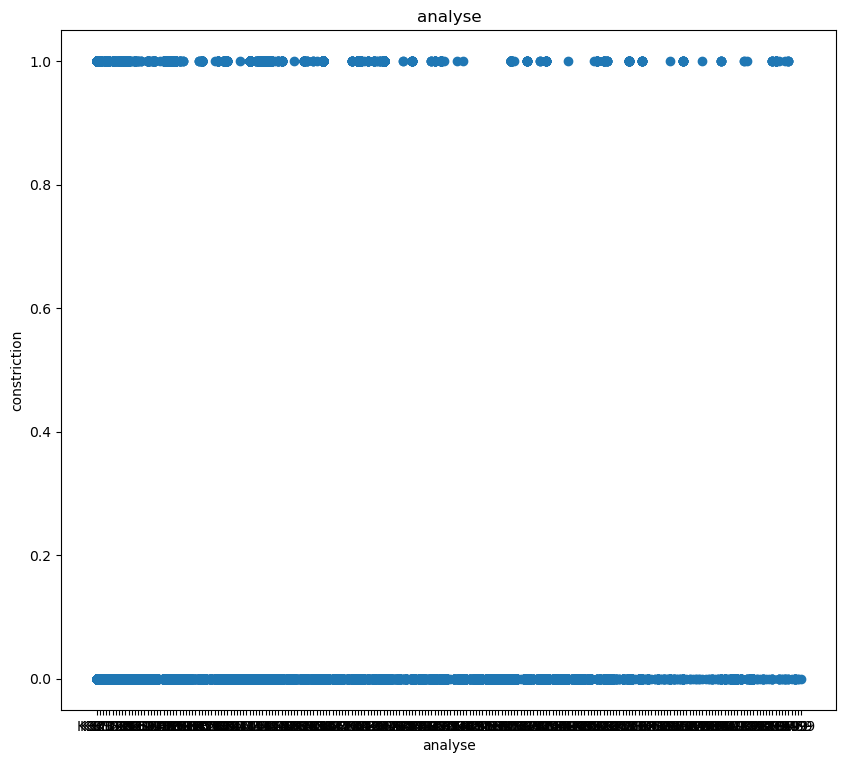

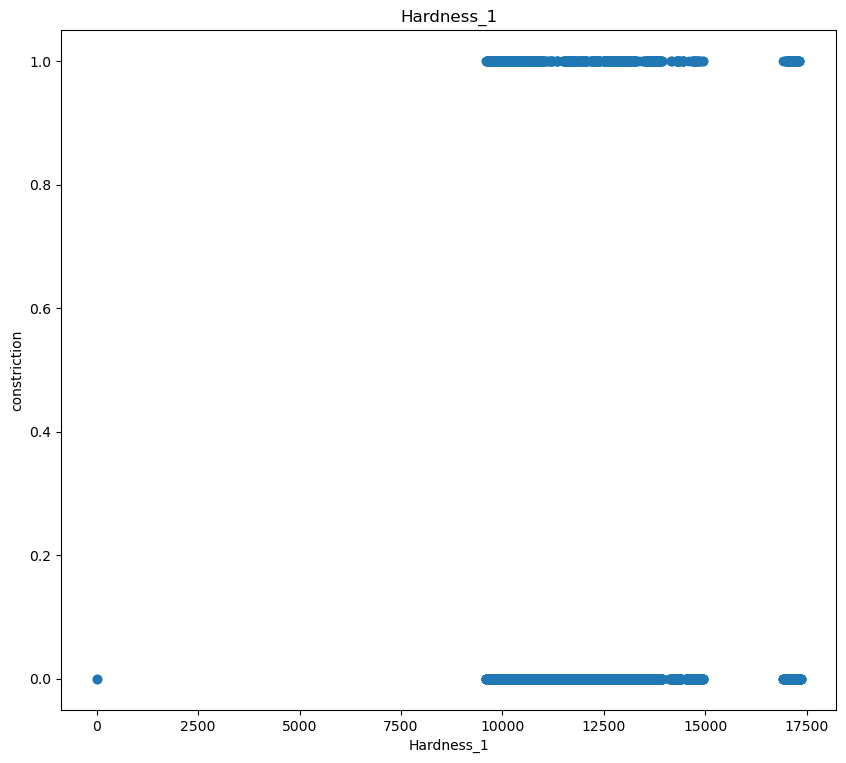

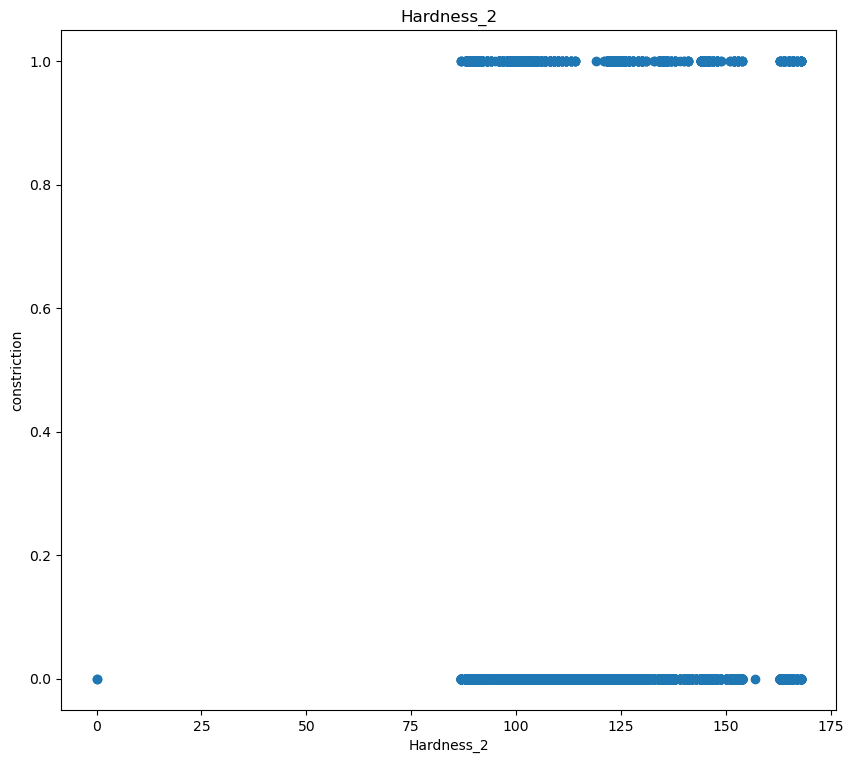

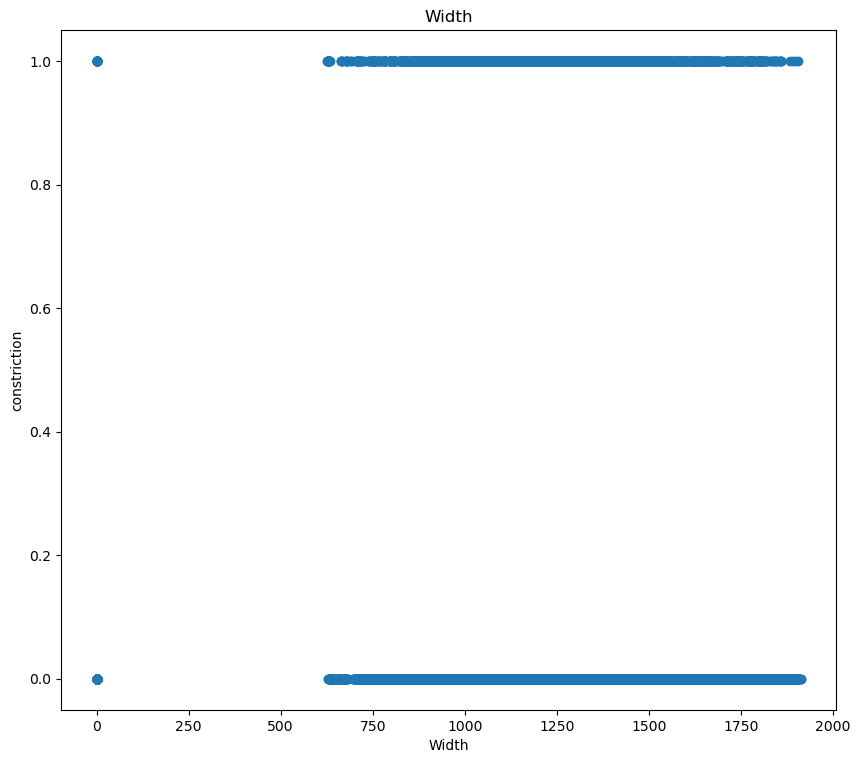

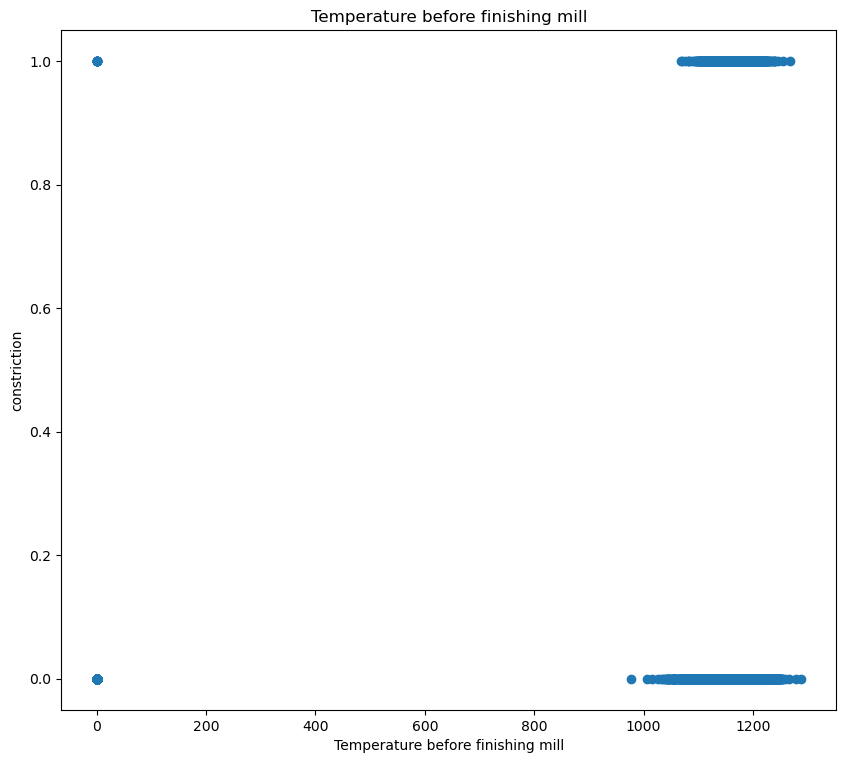

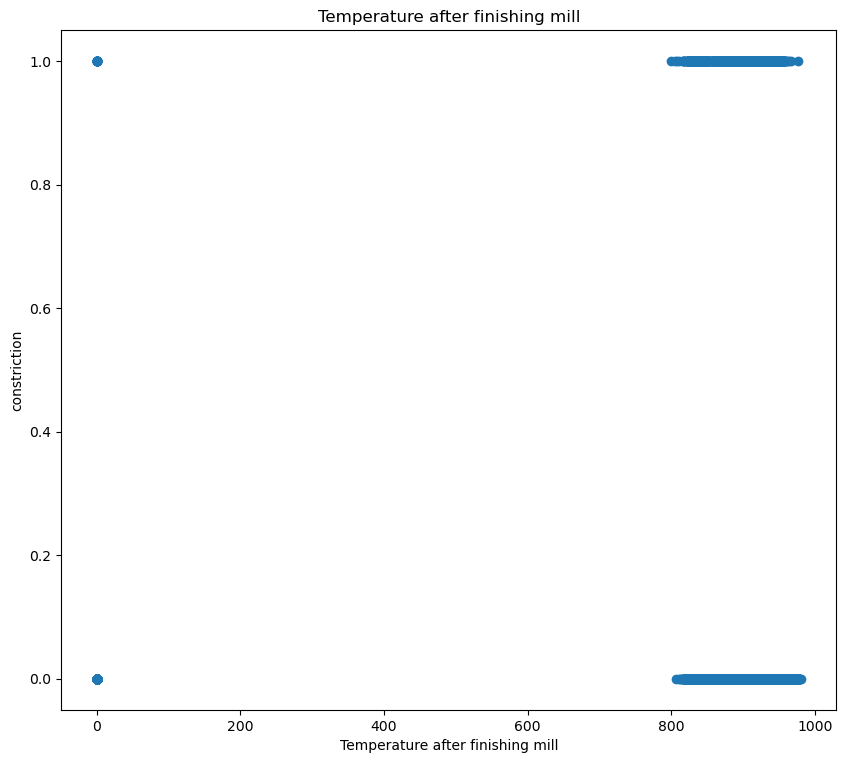

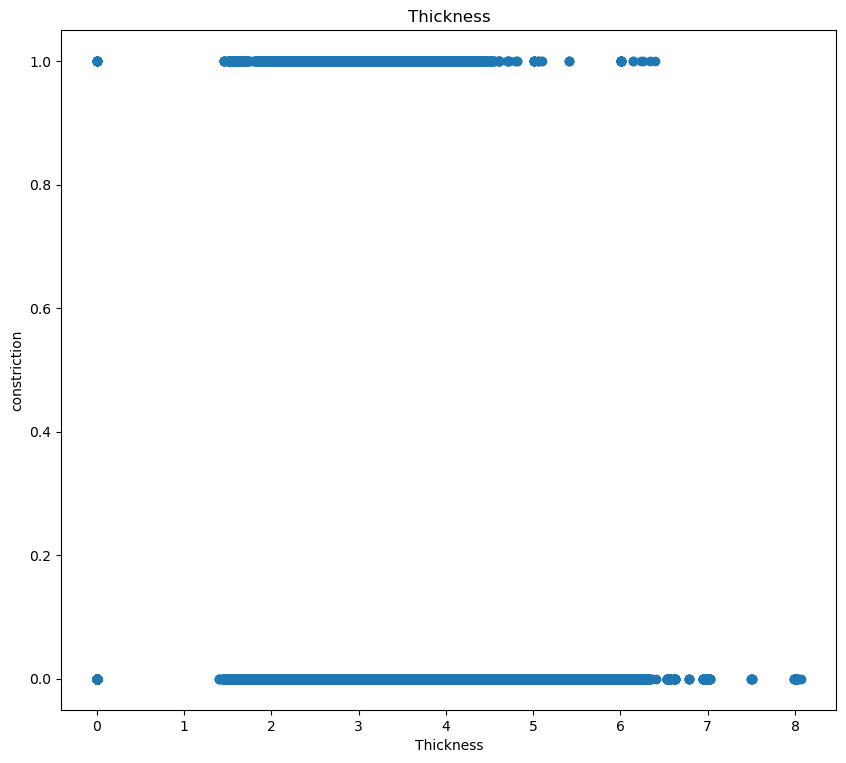

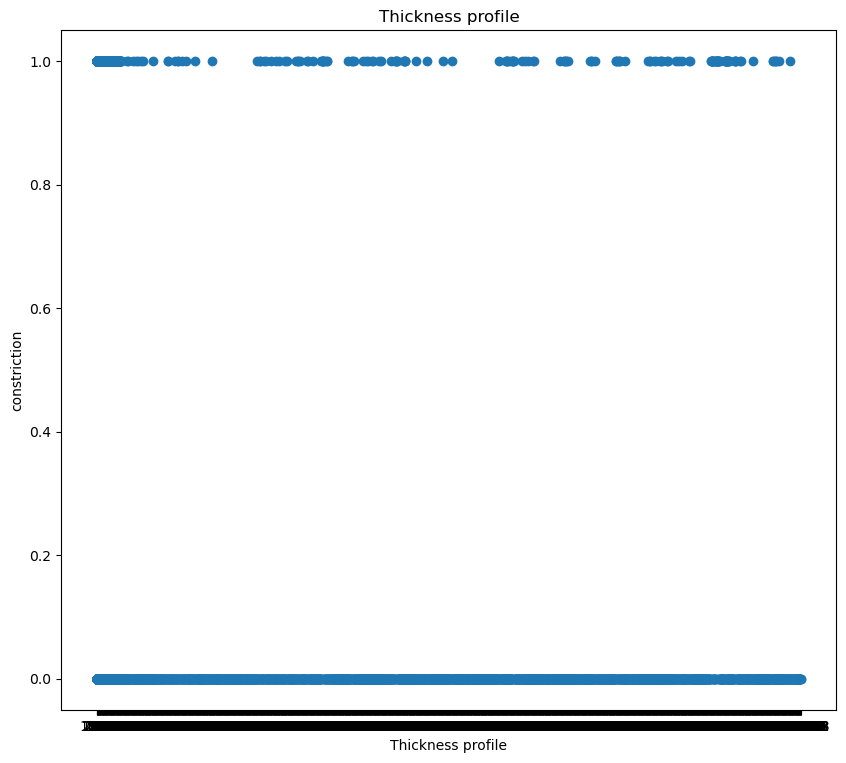

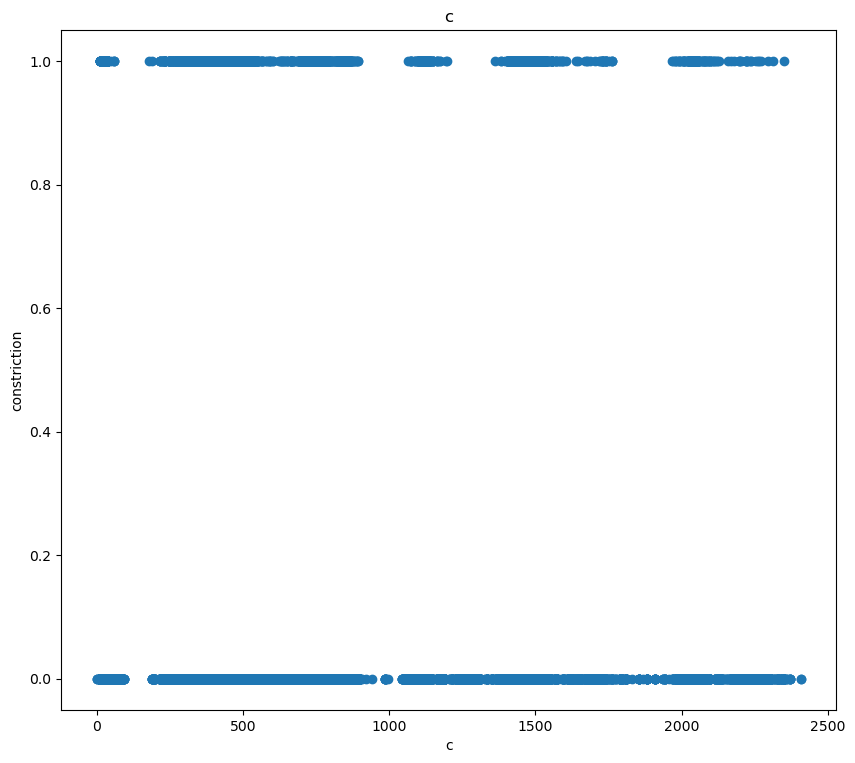

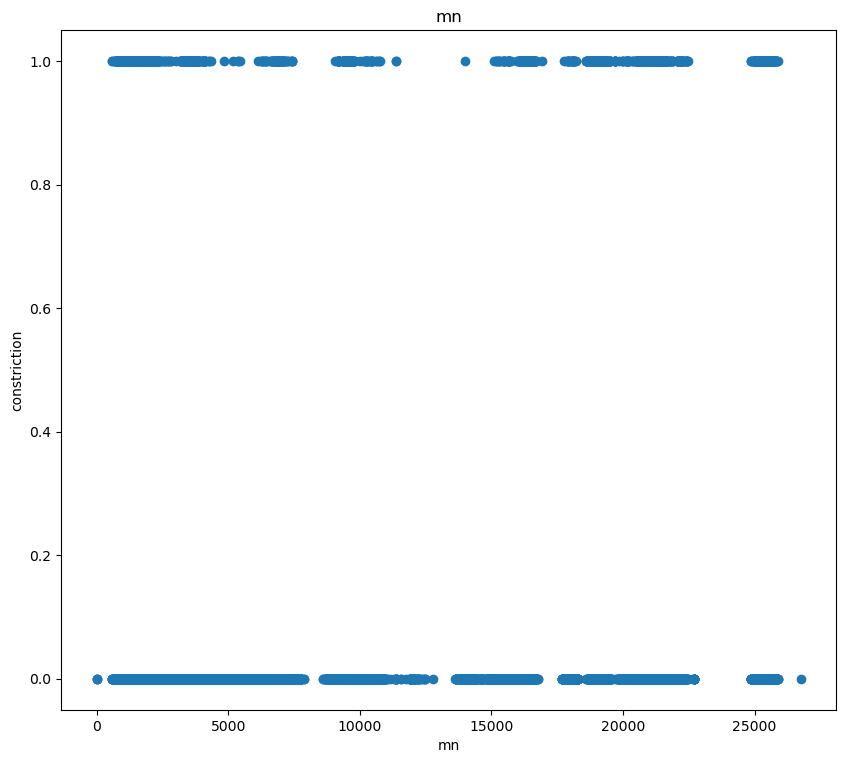

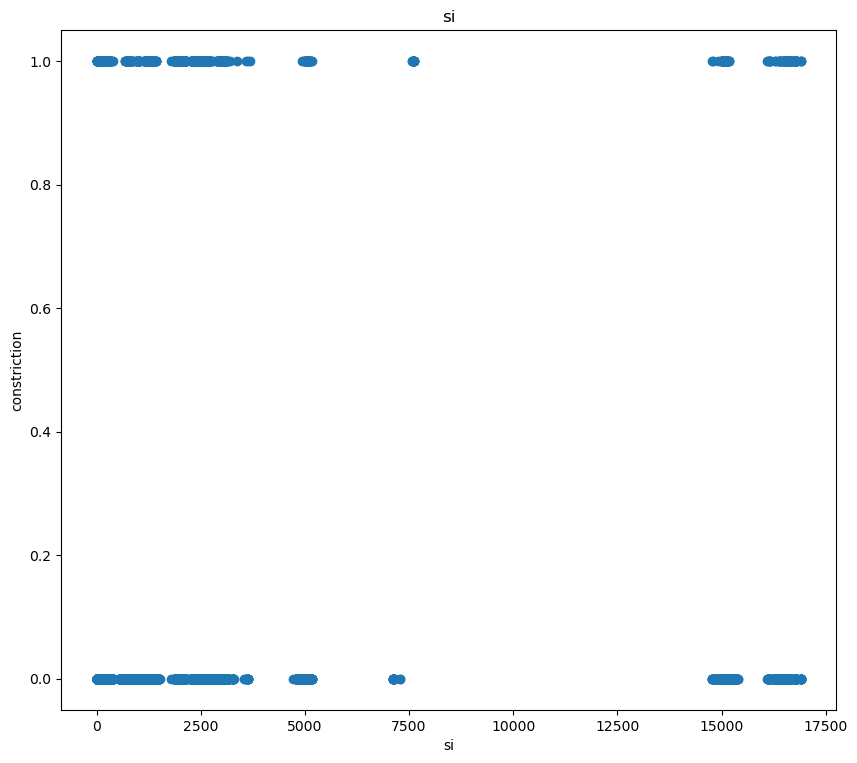

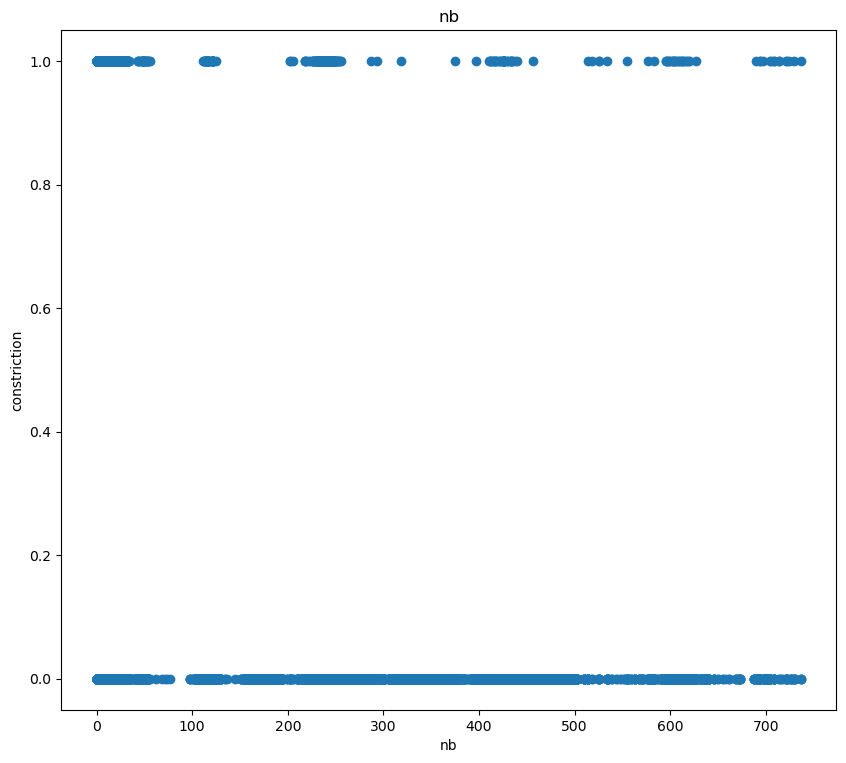

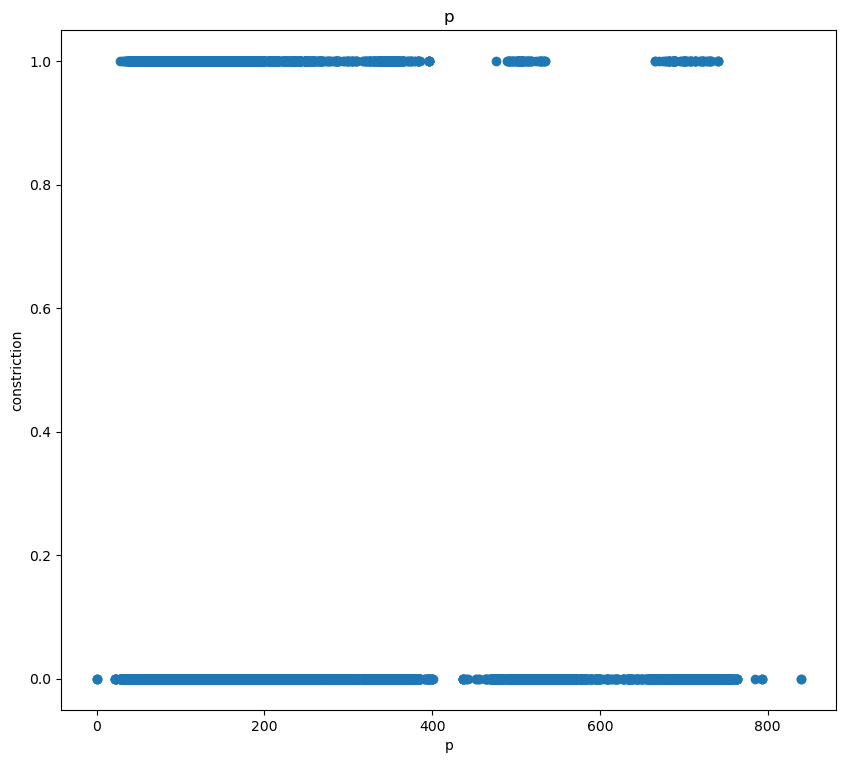

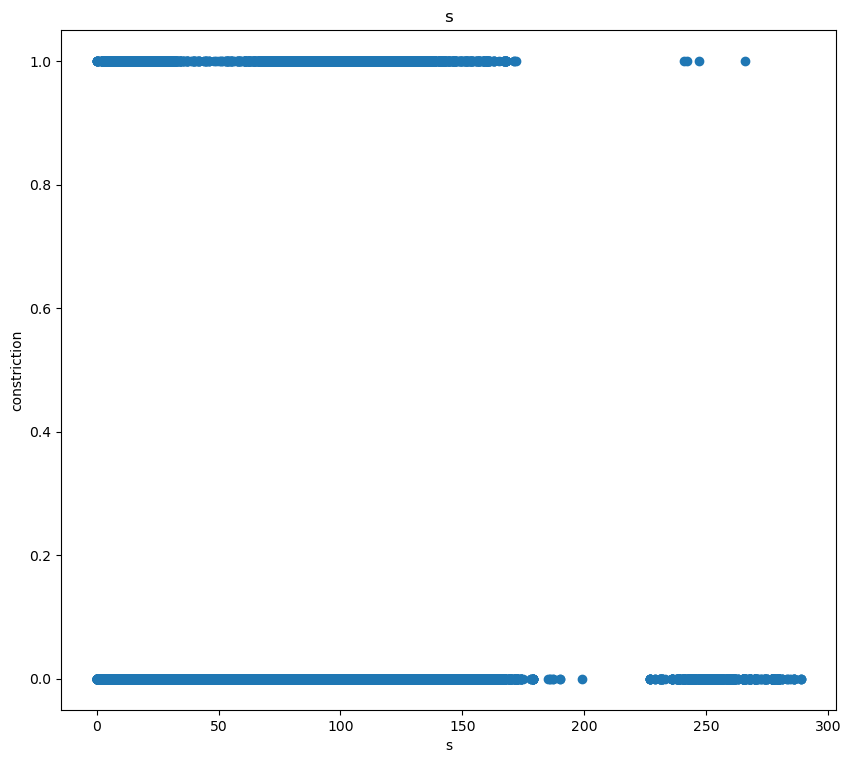

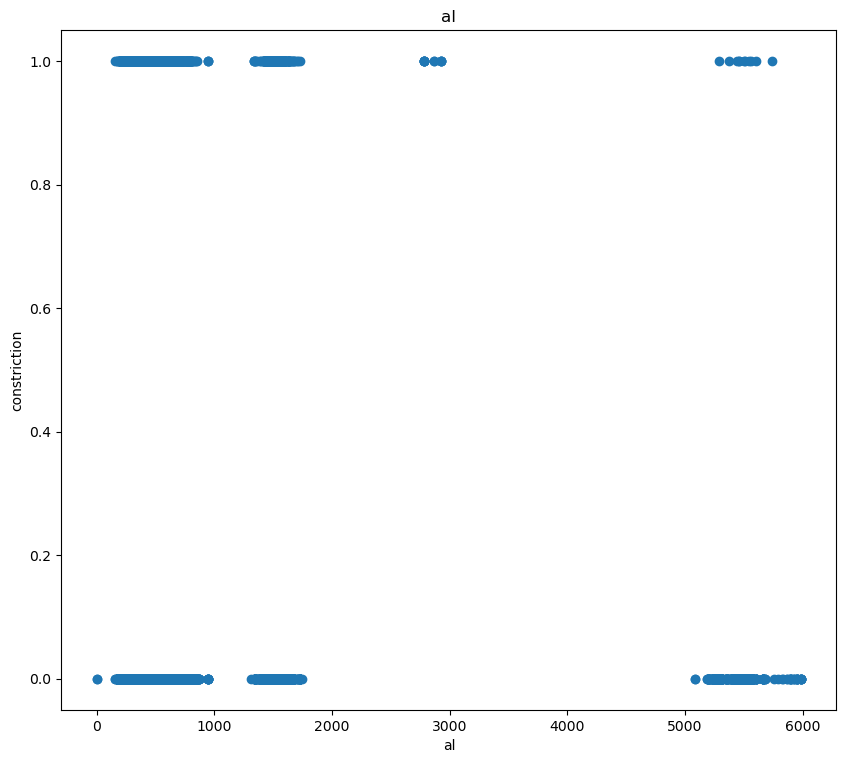

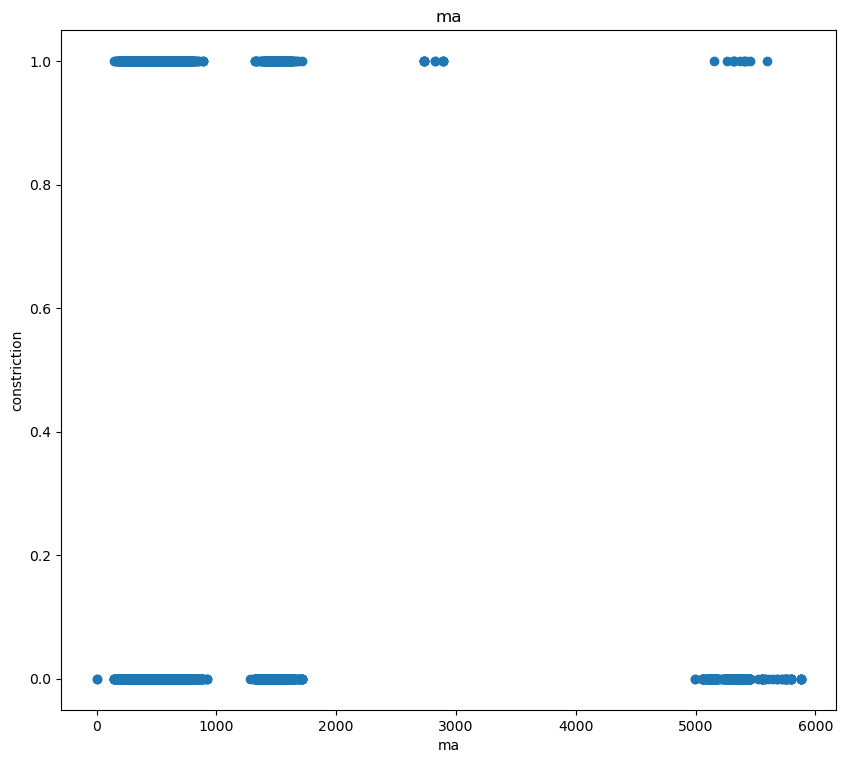

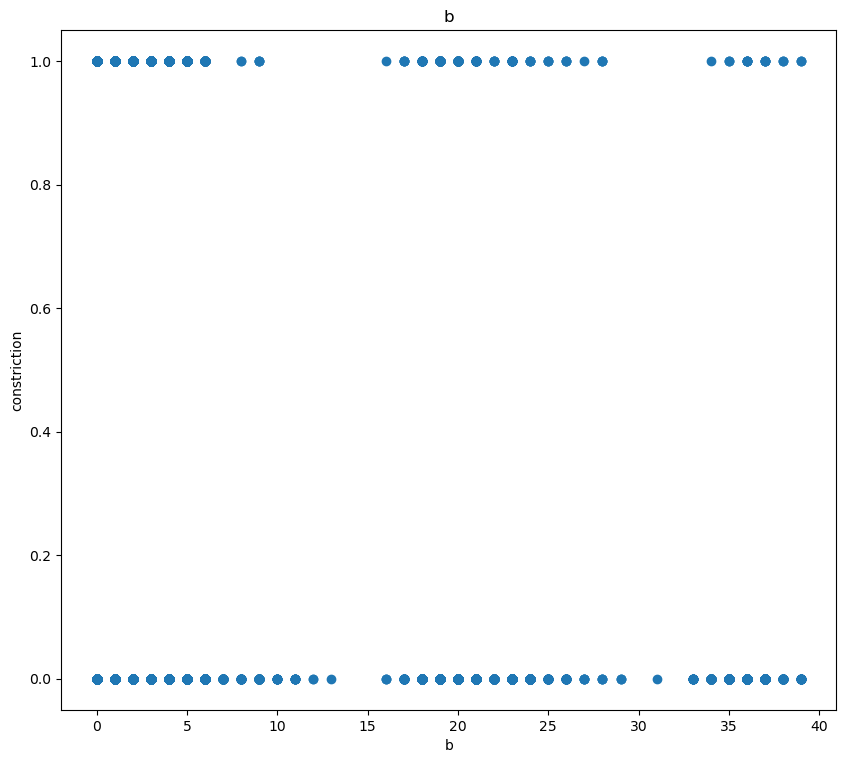

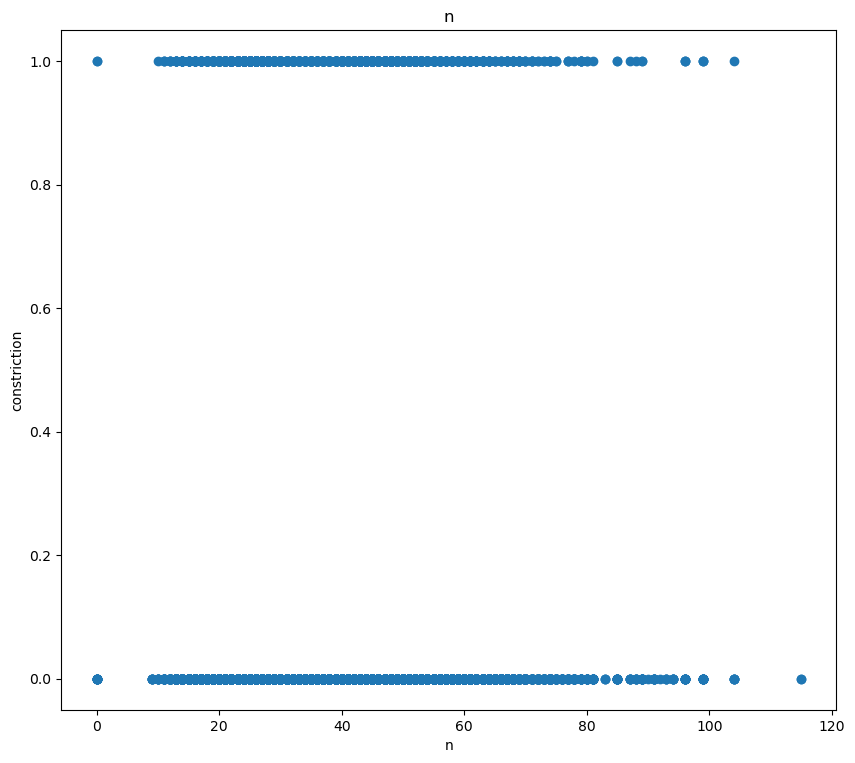

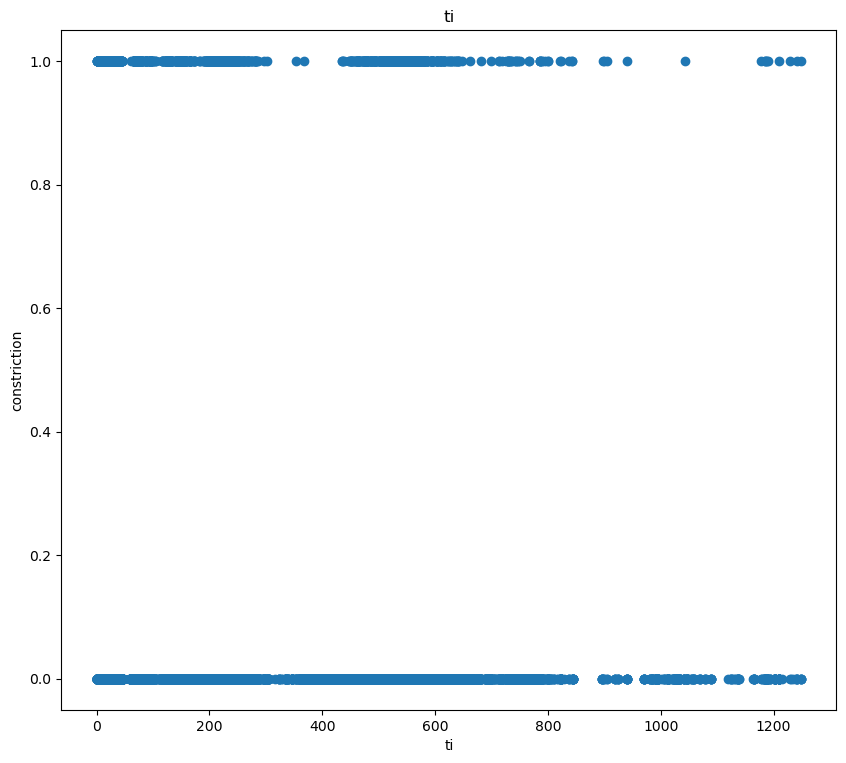

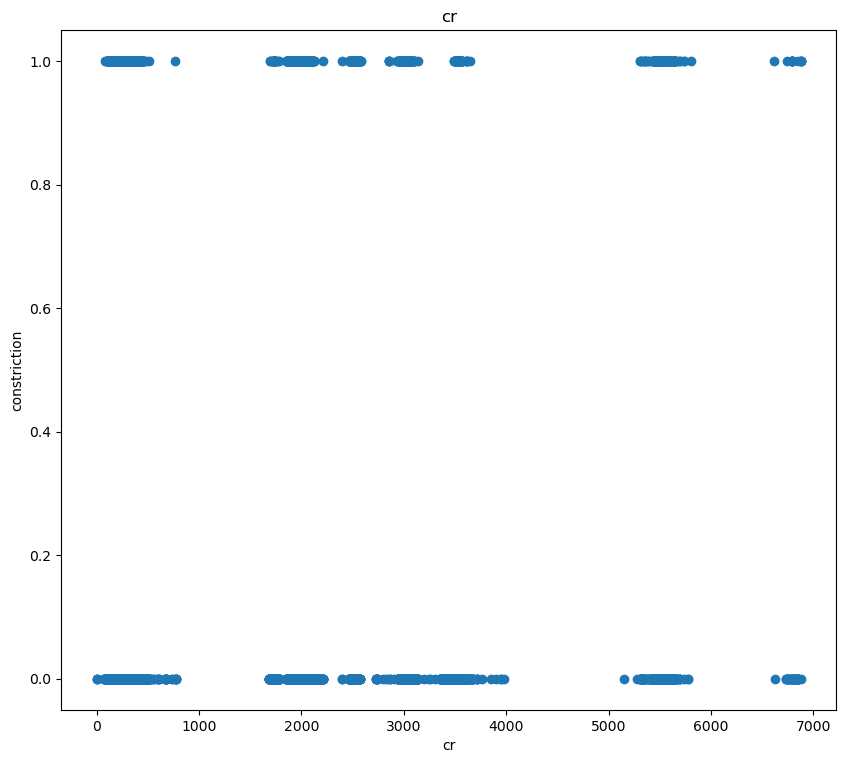

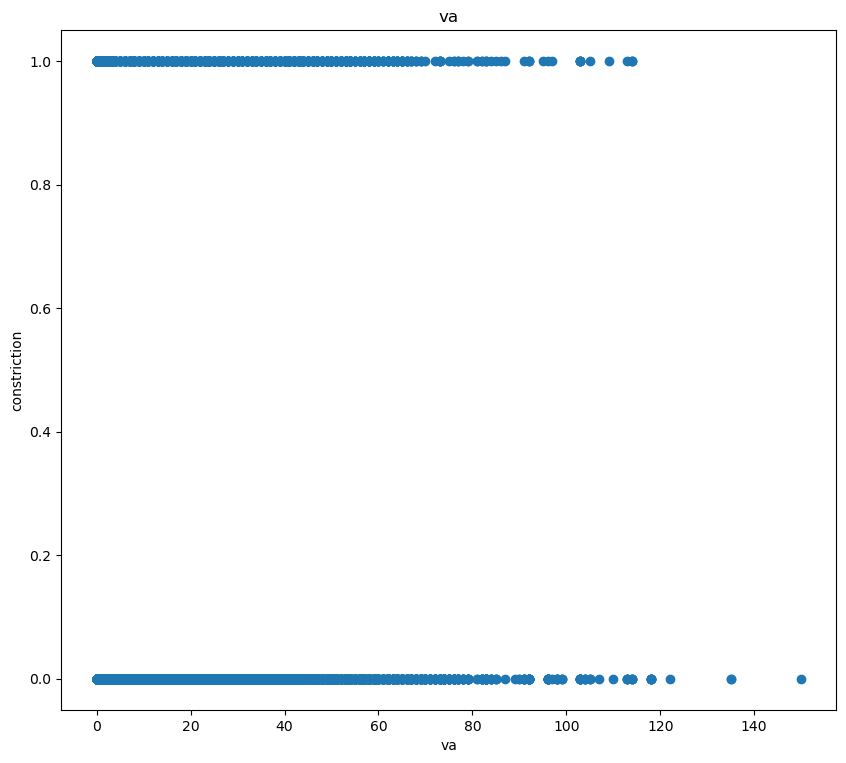

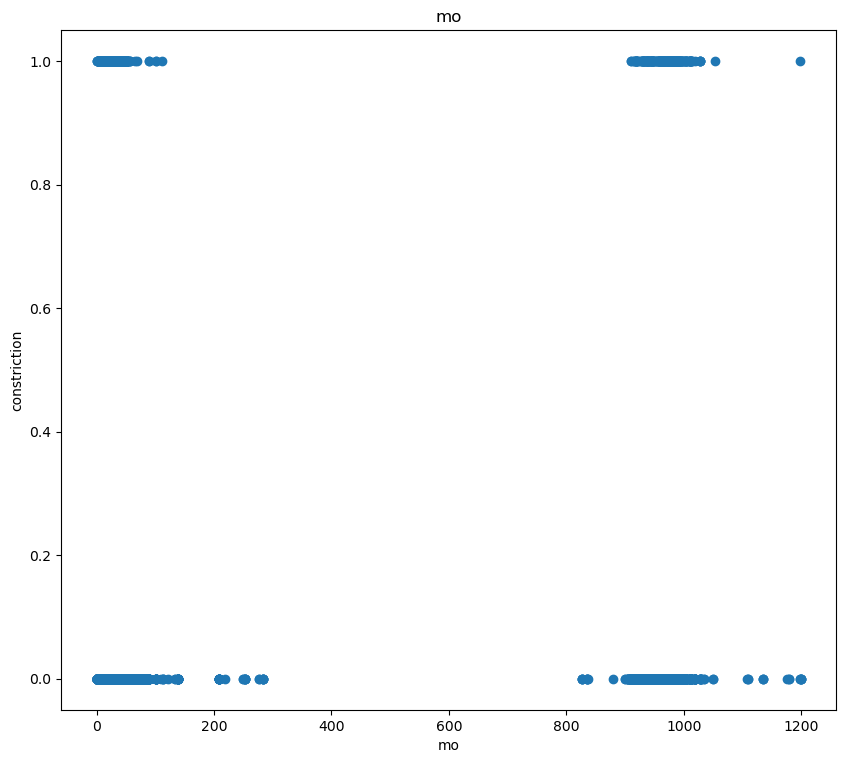

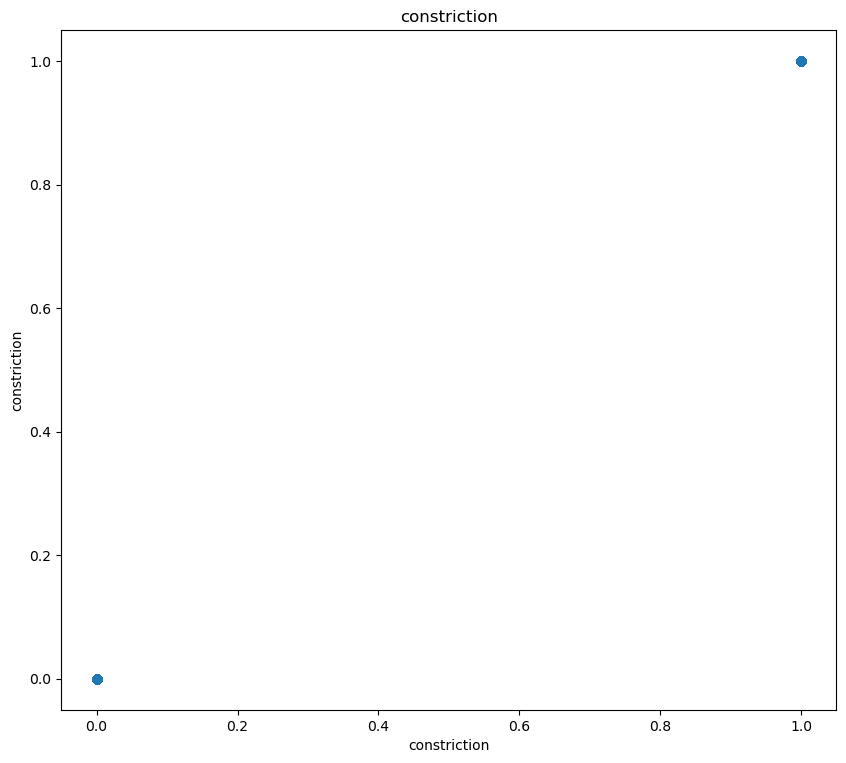

In [110]:
for col in columns:
    plt.figure(figsize=(10,9),dpi=100)
    plt.title(CoilData[col].name)
    plt.ylabel("constriction")
    plt.xlabel(CoilData[col].name)
    plt.scatter(CoilData[col],CoilData.constriction)
    #plt.close()

plt.show() 

In [111]:
columns

['coil',
 'furnace Number',
 'analyse',
 'Hardness_1',
 'Hardness_2',
 'Width',
 'Temperature before finishing mill',
 'Temperature after finishing mill',
 'Thickness',
 'Thickness profile',
 'c',
 'mn',
 'si',
 'nb',
 'p',
 's',
 'al',
 'ma',
 'b',
 'n',
 'ti',
 'cr',
 'va',
 'mo',
 'constriction']

### Classification

In [126]:
#Create datasets

everything = ['Hardness_1', 'Hardness_2', 'Width', 'Temperature before finishing mill','Temperature after finishing mill', 'Thickness', 'c', 'mn', 'si', 'nb', 'p', 's', 'al', 'ma', 'b', 'n', 'ti', 'cr', 'va', 'mo']
hand_picked = ['c','mn','p','s','al','ma','b','ti','va','mo']
X = CoilData[everything]
y = CoilData['constriction']

from sklearn.model_selection import train_test_split

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#### Models

##### RandomForest

In [139]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=30,class_weight={0:1,1:20})
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [129]:
from sklearn.tree import export_graphviz
estimator = clf.estimators_[5]

export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names =everything,
                class_names = ["NO constriction","CONSTRICTION"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [142]:
# Evaluate your model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#clf.score(X_train, y_train)


print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15476
           1       0.56      0.21      0.30      1123

    accuracy                           0.94     16599
   macro avg       0.75      0.60      0.63     16599
weighted avg       0.92      0.94      0.92     16599

[[15292   184]
 [  889   234]]
